<a href="https://colab.research.google.com/github/Shahidazad/Pytorch/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
# download training data
dataset =MNIST(root='data/',download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(dataset)

60000

In [5]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [6]:
test_dataset=MNIST(root='data/',train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FE6261AE790>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


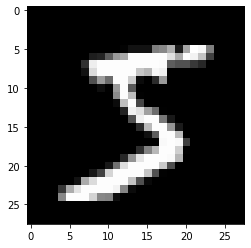

In [9]:
image,label=dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 9


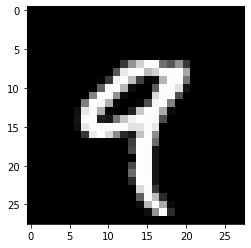

In [10]:
image,label=dataset[4]
plt.imshow(image,cmap='gray')
print('Label:',label)

In [11]:
import torchvision.transforms as transforms # convt image 2 tensor

In [12]:
dataset=MNIST(root='data/',train= True,transform=transforms.ToTensor())

In [13]:
img_tensor,label=dataset[0]
print(img_tensor.shape,label) # (1,28,28) (1 channel , 28 pixels. 28 pixels)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:,10:15,10:15]) # color,width,height
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


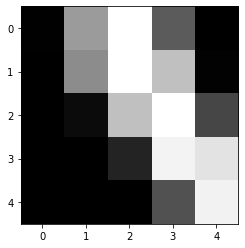

In [15]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray')

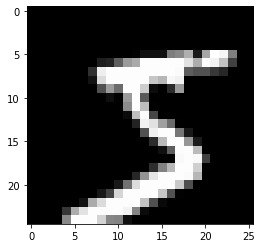

In [16]:
plt.imshow(img_tensor[0,0:25,0:26],cmap='gray')

In [17]:
# Training set - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
# Validation set - used to evaluate the model during training, adjust hyperparameters 
# (learning rate, etc.), and pick the best version of the model.
# Test set - used to compare different models or approaches and report the model's final accuracy.

In [18]:
import numpy as np
def split_indices(n,val_pct):
  # size of validation set
  n_val =int(val_pct*n)
  idxs=np.random.permutation(n)
  return idxs[n_val:],idxs[:n_val]

In [19]:
train_indices,val_indices = split_indices(len(dataset),val_pct=0.2)

In [20]:
print(len(train_indices),len(val_indices))
print('sample val ', val_indices[:12])

48000 12000
sample val  [33283 16391 49887 43934 21003 21187 59235 20670 46369 37435 50328 33168]


In [21]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader 

In [22]:
batch_size= 100
train_sampler =SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

val_sampler =SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                          batch_size,
                          sampler=val_sampler)


In [23]:
import torch.nn as   nn
input_size=28*28
num_classes=10

# Logistic  regression model
model =nn.Linear(input_size,num_classes)  # input ,output(target)

In [24]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0089,  0.0203,  0.0114,  ...,  0.0157,  0.0206,  0.0097],
        [ 0.0215, -0.0282, -0.0267,  ...,  0.0065,  0.0038, -0.0091],
        [ 0.0014, -0.0058,  0.0001,  ...,  0.0101,  0.0234,  0.0061],
        ...,
        [ 0.0091, -0.0205, -0.0323,  ...,  0.0180, -0.0039,  0.0244],
        [-0.0095, -0.0288,  0.0050,  ...,  0.0257, -0.0060,  0.0185],
        [ 0.0188, -0.0222, -0.0023,  ...,  0.0086, -0.0110,  0.0194]],
       requires_grad=True)

In [25]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0256,  0.0323, -0.0190,  0.0305, -0.0169, -0.0346, -0.0355, -0.0224,
        -0.0288,  0.0340], requires_grad=True)

In [26]:
for images,labels in train_loader:
  print(labels)
  print(images.shape)
  outputs= model(images)
  break

tensor([4, 9, 8, 2, 1, 1, 5, 8, 6, 5, 6, 8, 2, 0, 3, 1, 9, 9, 7, 9, 0, 3, 3, 2,
        3, 6, 4, 3, 6, 9, 8, 7, 5, 1, 1, 1, 5, 2, 2, 0, 0, 1, 1, 3, 3, 2, 7, 2,
        3, 6, 5, 6, 1, 3, 9, 7, 2, 0, 0, 1, 0, 0, 2, 3, 7, 3, 4, 3, 8, 9, 4, 2,
        6, 6, 7, 3, 2, 9, 0, 8, 3, 6, 7, 9, 5, 8, 6, 0, 1, 0, 9, 1, 9, 8, 0, 9,
        3, 8, 4, 1])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [27]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear =nn.Linear(input_size,num_classes)

  def  forward(self,xb):
    xb=xb.reshape(-1,784)# -1 automatic shape calculation
    out=self.linear(xb)
    return out

model= MnistModel()


In [28]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [29]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0041, -0.0255,  0.0349,  ...,  0.0308,  0.0019,  0.0256],
         [-0.0046, -0.0086, -0.0172,  ..., -0.0233,  0.0154, -0.0099],
         [ 0.0201,  0.0007, -0.0118,  ...,  0.0006, -0.0120,  0.0331],
         ...,
         [ 0.0077, -0.0307,  0.0247,  ...,  0.0339,  0.0319, -0.0027],
         [-0.0054, -0.0317,  0.0228,  ..., -0.0173, -0.0145, -0.0007],
         [-0.0266, -0.0106, -0.0254,  ...,  0.0288,  0.0221,  0.0243]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0315, -0.0036,  0.0101, -0.0251, -0.0265, -0.0252,  0.0352, -0.0201,
         -0.0250,  0.0260], requires_grad=True)]

In [30]:
for image,labels in train_loader:
  outputs = model(images)
  break

print('output.shape',outputs.shape)
print('sample output',outputs[:2].data)

output.shape torch.Size([100, 10])
sample output tensor([[-0.1895, -0.1379,  0.0182, -0.0741,  0.1235,  0.3163,  0.1042,  0.1368,
          0.2151,  0.1598],
        [ 0.1039,  0.0128, -0.1870,  0.1499, -0.2533,  0.1016,  0.2363,  0.0385,
         -0.0703,  0.3776]])


In [31]:
# softmax use to convert output into probability



In [32]:
import torch.nn.functional as F

In [33]:
# apply softmax for each output row
probs=F.softmax(outputs,dim=1) 
# sample probability
print('sample probality',probs[:2].data)
# add probability 
print('sum',torch.sum(probs[0]).item()) # probabilities should sum up to 1

sample probality tensor([[0.0765, 0.0805, 0.0941, 0.0858, 0.1046, 0.1268, 0.1026, 0.1060, 0.1146,
         0.1084],
        [0.1038, 0.0947, 0.0776, 0.1086, 0.0726, 0.1035, 0.1184, 0.0972, 0.0872,
         0.1364]])
sum 1.0000001192092896


In [34]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([5, 9, 1, 1, 1, 1, 5, 1, 6, 8, 1, 1, 1, 9, 6, 2, 2, 9, 9, 2, 6, 1, 9, 1,
        1, 2, 5, 9, 2, 7, 9, 1, 1, 5, 1, 5, 6, 1, 7, 6, 5, 1, 1, 6, 1, 5, 9, 8,
        6, 6, 8, 5, 1, 7, 7, 9, 2, 6, 6, 7, 1, 6, 6, 6, 9, 7, 7, 9, 2, 9, 1, 1,
        2, 2, 9, 1, 1, 1, 6, 1, 9, 2, 9, 7, 6, 7, 6, 9, 1, 9, 5, 1, 7, 9, 1, 7,
        9, 7, 7, 1])
tensor([0.1268, 0.1364, 0.1313, 0.1235, 0.1202, 0.1371, 0.1202, 0.1337, 0.1300,
        0.1213, 0.1243, 0.1257, 0.1518, 0.1290, 0.1513, 0.1143, 0.1287, 0.1278,
        0.1350, 0.1319, 0.1508, 0.1289, 0.1210, 0.1400, 0.1277, 0.1191, 0.1162,
        0.1275, 0.1336, 0.1382, 0.1208, 0.1281, 0.1297, 0.1186, 0.1144, 0.1188,
        0.1492, 0.1330, 0.1466, 0.1329, 0.1255, 0.1182, 0.1138, 0.1364, 0.1588,
        0.1256, 0.1386, 0.1386, 0.1315, 0.1192, 0.1261, 0.1154, 0.1239, 0.1183,
        0.1138, 0.1429, 0.1206, 0.1561, 0.1292, 0.1088, 0.1450, 0.1492, 0.1405,
        0.1343, 0.1181, 0.1236, 0.1140, 0.1212, 0.1272, 0.1439, 0.1212, 0.1318,
        0.1296, 0.1

In [35]:
labels

tensor([2, 6, 2, 7, 5, 9, 2, 0, 0, 0, 4, 2, 2, 4, 4, 3, 1, 9, 2, 0, 1, 5, 6, 3,
        4, 6, 7, 5, 1, 3, 3, 1, 3, 1, 1, 8, 8, 1, 3, 8, 9, 0, 6, 4, 0, 4, 4, 5,
        5, 9, 6, 2, 0, 6, 1, 3, 8, 7, 5, 4, 4, 5, 8, 1, 8, 2, 1, 1, 7, 3, 0, 5,
        3, 3, 8, 6, 4, 2, 7, 1, 4, 3, 8, 5, 1, 2, 2, 1, 9, 1, 3, 5, 4, 7, 5, 3,
        7, 7, 5, 3])

In [36]:
# we have set weight randomly so accuracy is very low
# we need to adjust weight by gradient descent


In [37]:
labels==preds

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False,  True, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, False, False])

In [38]:
torch.sum(labels==preds).item()/len(labels)

0.06

In [39]:
def accuracy(l1,l2):
  return torch.sum(l1==l2).item()/len(l1)

In [40]:
loss_fn = F.cross_entropy

In [41]:
# loss for current batch data
loss=loss_fn(outputs,labels)
loss

tensor(2.3387, grad_fn=<NllLossBackward0>)

In [42]:
learning_rate = 0.001
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [43]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):
  # calculate loss
  preds=model(xb)
  loss=loss_fn(preds,yb)

  if opt is not None:
    # compute gradient
    loss.backward()
    # update parameter
    opt.step()
    # reset gradient
    opt.zero_grad() # clear intermediate calculation
  metric_result=None
  if metric  is not None:
    metric_result=metric(preds,yb)
  return loss.item(),len(xb),metric_result


In [44]:

def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():# we dot not require gradient for validation it is only for training set
    results= [loss_batch(model,loss_fn,xb,yb,metric= metric) for xb,yb in valid_dl]
    # unpacking
    losses,nums,metrics=zip(*results)
    # total size of dataset
    total= np.sum(nums)
    avg_loss=np.sum(np.multiply(losses,nums)) / total
    avg_metrics =None
    if  metric is not None:
      avg_metric = np.sum(np.multiply(metrics,nums)) / total
    return avg_loss,total,avg_metric


In [45]:
def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds== labels).item() /len(preds)


In [46]:
val_loss,total,val_acc =  evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss : {:.4f}, Accuracy : {:.4f}'.format(val_loss,val_acc))


Loss : 2.2905, Accuracy : 0.1542


In [47]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    # training
    for xb,yb in train_dl:
      loss, _, _= loss_batch(model,loss_fn, xb,yb,opt)
    
    # evaluation
    result =evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric = result


    if metric is None:
      print('Epochs [{}/{}], loss :{:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch [{} / {}],loss: {:.4f},{}:{:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [48]:
# redefine model and optimizer
model= MnistModel()
optimizer =torch.optim.SGD(model.parameters(),lr=learning_rate)

In [49]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1 / 5],loss: 1.8868,accuracy:0.6641
Epoch [2 / 5],loss: 1.5861,accuracy:0.7403
Epoch [3 / 5],loss: 1.3746,accuracy:0.7782
Epoch [4 / 5],loss: 1.2226,accuracy:0.7937
Epoch [5 / 5],loss: 1.1097,accuracy:0.8089


In [50]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1 / 5],loss: 1.0233,accuracy:0.8185
Epoch [2 / 5],loss: 0.9552,accuracy:0.8252
Epoch [3 / 5],loss: 0.9003,accuracy:0.8295
Epoch [4 / 5],loss: 0.8551,accuracy:0.8330
Epoch [5 / 5],loss: 0.8171,accuracy:0.8370


In [51]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1 / 5],loss: 0.7847,accuracy:0.8396
Epoch [2 / 5],loss: 0.7568,accuracy:0.8433
Epoch [3 / 5],loss: 0.7324,accuracy:0.8460
Epoch [4 / 5],loss: 0.7109,accuracy:0.8482
Epoch [5 / 5],loss: 0.6919,accuracy:0.8500


In [52]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1 / 5],loss: 0.6748,accuracy:0.8518
Epoch [2 / 5],loss: 0.6594,accuracy:0.8542
Epoch [3 / 5],loss: 0.6455,accuracy:0.8558
Epoch [4 / 5],loss: 0.6327,accuracy:0.8570
Epoch [5 / 5],loss: 0.6211,accuracy:0.8581


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

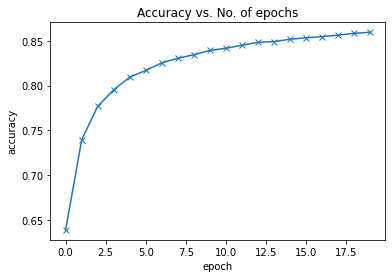

In [53]:
accuracies =[0.6391,0.7395,0.7768,0.7953,0.8094,0.8168,0.8253,0.8304,0.8343,0.8391,
             0.8416,0.8449,0.8482,0.8490,0.8516,
             0.8532,0.8545,0.8562,0.8582,0.8594]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [54]:
!pip install jovian


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 4.4 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=77378a53df049bf6c61b538984e4941ce69628b7f94dee32e4f136544c313978
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [55]:
import jovian

In [56]:
# test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor()
                     )

shape torch.Size([1, 28, 28])
labels 7


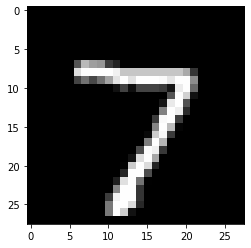

In [57]:
img,label =test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('shape',img.shape)
print('labels',label)

In [58]:
img.unsqueeze(0).shape # convert to 1 batch

torch.Size([1, 1, 28, 28])

In [59]:
def predict_image(img,model):
  xb=img.unsqueeze(0)
  yb =model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()



label 7 predict 7


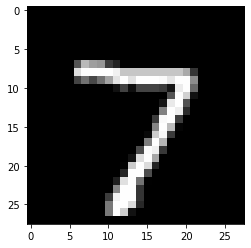

In [61]:
img,label =   test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('label',label,'predict',predict_image(img,model))

label 0 predict 0


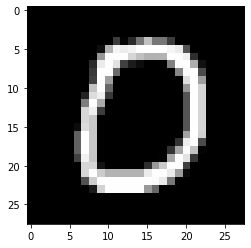

In [62]:
img,label =   test_dataset[10]
plt.imshow(img[0],cmap='gray')
print('label',label,'predict',predict_image(img,model))

label 9 predict 9


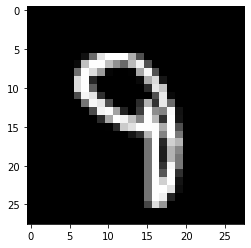

In [63]:
img,label =   test_dataset[193]
plt.imshow(img[0],cmap='gray')
print('label',label,'predict',predict_image(img,model))

label 2 predict 8


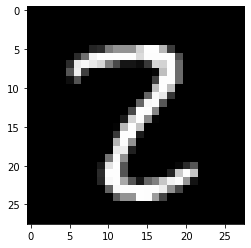

In [64]:
img,label =   test_dataset[1839]
plt.imshow(img[0],cmap='gray')
print('label',label,'predict',predict_image(img,model))

label 3 predict 3


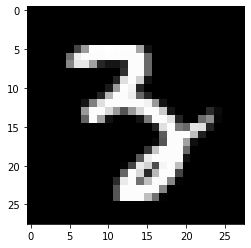

In [65]:
img,label =   test_dataset[87]
plt.imshow(img[0],cmap='gray')
print('label',label,'predict',predict_image(img,model))

In [68]:
test_loader =DataLoader(test_dataset,batch_size=200)
test_loss,total,test_acc=evaluate(model,loss_fn,test_loader,metric=accuracy)
print('Loss:{:.4f},accuracy {:.4F}'.format(test_loss,test_acc))

Loss:0.5958,accuracy 0.8680


In [69]:
torch.save(model.state_dict(),'mnist-logistic.pth') # Saving model to reuse some time

In [70]:
model.state_dict() # contain weight and bias

OrderedDict([('linear.weight',
              tensor([[ 0.0168, -0.0093, -0.0292,  ...,  0.0092, -0.0356,  0.0344],
                      [ 0.0244,  0.0008,  0.0065,  ..., -0.0219,  0.0161, -0.0110],
                      [-0.0262, -0.0054,  0.0159,  ...,  0.0191,  0.0070,  0.0008],
                      ...,
                      [ 0.0265,  0.0165,  0.0154,  ..., -0.0134,  0.0122, -0.0185],
                      [ 0.0077,  0.0277,  0.0127,  ...,  0.0072,  0.0155, -0.0098],
                      [ 0.0335, -0.0320, -0.0286,  ..., -0.0352,  0.0317,  0.0322]])),
             ('linear.bias',
              tensor([-0.0428,  0.1136, -0.0282, -0.0419,  0.0354,  0.0327, -0.0121,  0.0803,
                      -0.1147, -0.0321]))])

In [71]:
# reload model 
model2=MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth')) # PATH
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0168, -0.0093, -0.0292,  ...,  0.0092, -0.0356,  0.0344],
                      [ 0.0244,  0.0008,  0.0065,  ..., -0.0219,  0.0161, -0.0110],
                      [-0.0262, -0.0054,  0.0159,  ...,  0.0191,  0.0070,  0.0008],
                      ...,
                      [ 0.0265,  0.0165,  0.0154,  ..., -0.0134,  0.0122, -0.0185],
                      [ 0.0077,  0.0277,  0.0127,  ...,  0.0072,  0.0155, -0.0098],
                      [ 0.0335, -0.0320, -0.0286,  ..., -0.0352,  0.0317,  0.0322]])),
             ('linear.bias',
              tensor([-0.0428,  0.1136, -0.0282, -0.0419,  0.0354,  0.0327, -0.0121,  0.0803,
                      -0.1147, -0.0321]))])

In [72]:
test_loader =DataLoader(test_dataset,batch_size=200)
test_loss,total,test_acc=evaluate(model2,loss_fn,test_loader,metric=accuracy)
print('Loss:{:.4f},accuracy {:.4F}'.format(test_loss,test_acc))

Loss:0.5958,accuracy 0.8680


In [ ]:
# TRY TO CHANGE BATCH SIZE
# TRY TO CHANGE LEARNING RATE 
 